In [1]:
print('😀😀😀 导入依赖库')
# 导入库
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# retina screen
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

😀😀😀 导入依赖库


In [2]:
# 加载训练数据（通报的软件）详情
training_app_data = pd.read_csv("./traning_app_list.csv")
print('😀😀😀 加载训练数据')

😀😀😀 加载训练数据


In [3]:
# 加载测试数据（排行榜软件）详情
test_app_data = pd.read_csv("./test_app_list.csv")
print('😀😀😀 加载测试数据')

😀😀😀 加载测试数据


In [5]:
# 查看大小
print('😀😀😀 训练数据大小：'+ str(training_app_data.shape))
print('😀😀😀 测试数据大小：'+ str(test_app_data.shape))

😀😀😀 训练数据大小：(144, 10)
😀😀😀 测试数据大小：(796, 10)


In [6]:
# 预览前3条数据
training_app_data.head(3)

,app_name,app_version,app_store_url,icon_url,size,cate_str,android_req_version,permission_str,privacy,developer
0,虎牙直播,8.14.25,https://m.wandoujia.com/apps/2180653/history_v...,https://android-artworks.25pp.com/fs08/2021/05...,101.46,"影音播放,视频,直播,",5,"添加或修改日历活动，并在所有者不知情的情况下向邀请对象发送电子邮件,读取日历活动和机密信息,...",https://hd.huya.com/huyaDIYzt/6811/pc/index.ht...,广州虎牙信息科技有限公司
1,Keep,7.2.1,https://m.wandoujia.com/apps/6607993/history_v...,https://android-artworks.25pp.com/fs08/2021/05...,66.60,"健康运动,减肥健身,",5,"添加或修改日历活动，并在所有者不知情的情况下向邀请对象发送电子邮件,读取日历活动和机密信息,...",http://www.gotokeep.com/privacy.html,北京卡路里科技有限公司
2,一直播,3.5.7,https://m.wandoujia.com/apps/6760442/history_v181,https://android-artworks.25pp.com/fs08/2021/03...,72.82,"影音播放,直播,",4.3.x,"添加或修改日历活动，并在所有者不知情的情况下向邀请对象发送电子邮件,读取日历活动和机密信息,...",https://www.yizhibo.com/,小咖秀（北京）科技有限公司


In [7]:
test_app_data.head(3)

,app_name,app_version,app_store_url,icon_url,size,cate_str,android_req_version,permission_str,privacy,developer
0,淘宝,10.1.0,https://m.wandoujia.com/apps/32267,https://android-artworks.25pp.com/fs08/2021/06...,158.27,"网上购物,商城,",4.0.2,"添加或修改日历活动，并在所有者不知情的情况下向邀请对象发送电子邮件,读取日历活动和机密信息,...",https://terms.alicdn.com/legal-agreement/terms...,淘宝（中国）软件有限公司
1,微信,8.0.6,https://m.wandoujia.com/apps/596157,https://android-artworks.25pp.com/fs08/2021/05...,179.24,"通讯社交,聊天,",5,"修改您的通讯录,读取您的通讯录,勿扰模式使用权限,请求忽略电池优化,请求安装文件包,卸载快捷...",http://weixin.qq.com/cgi-bin/readtemplate?lang...,腾讯
2,抖音,16.3.0,https://m.wandoujia.com/apps/7461948,https://android-artworks.25pp.com/fs08/2021/06...,112.11,"摄影图像,相机,短视频,",4.1.x,"添加或修改日历活动，并在所有者不知情的情况下向邀请对象发送电子邮件,读取日历活动和机密信息,...",https://www.douyin.com/agreements/?id=67739011...,北京微播视界科技有限公司


In [8]:
# 将privacy不为空的改为1
training_app_data.loc[training_app_data[training_app_data['privacy']!='0'].index.tolist(),'privacy'] = 1
test_app_data.loc[test_app_data[test_app_data['privacy']!='0'].index.tolist(),'privacy'] = 1

# 扔掉用不到的列

# APP版本
training_app_data.drop("app_version", axis = 1, inplace = True)
# 商城地址，无意义
training_app_data.drop("app_store_url", axis = 1, inplace = True)
# 图标地址，无意义
training_app_data.drop("icon_url", axis = 1, inplace = True)
# 安卓最低版本
training_app_data.drop("android_req_version", axis = 1, inplace = True)
# 开发者
training_app_data.drop("developer", axis = 1, inplace = True)



# APP版本
test_app_data.drop("app_version", axis = 1, inplace = True)
# 商城地址，无意义
test_app_data.drop("app_store_url", axis = 1, inplace = True)
# 图标地址，无意义
test_app_data.drop("icon_url", axis = 1, inplace = True)
# 安卓最低版本
test_app_data.drop("android_req_version", axis = 1, inplace = True)
# 开发者
test_app_data.drop("developer", axis = 1, inplace = True)


print('😀😀😀 已去除training/test data中版本、商城地址、图标地址、安卓最低版本、开发者字段')

😀😀😀 已去除training/test data中版本、商城地址、图标地址、安卓最低版本、开发者字段


In [9]:
# 切割字符，取类别和权限合集

# 类别、权限、需要取两份数据的合集

cate_group = []
permission_group = []


for index,row in training_app_data.iterrows():
    
    cate_str =  row['cate_str']
    cate_list = cate_str.split(',')[:-1]
    
    permission_str =  row['permission_str']
    permission_list  = permission_str.split(',')[:-1]
    
    # 取合集
    cate_group = list(set(cate_list).union(set(cate_group)))
    permission_group = list(set(permission_list).union(set(permission_group)))

    
for index,row in test_app_data.iterrows():
    
    cate_str =  row['cate_str']
    cate_list = cate_str.split(',')[:-1]
    
    permission_str =  row['permission_str']
    permission_list  = permission_str.split(',')[:-1]
    
    # 取合集
    cate_group = list(set(cate_list).union(set(cate_group)))
    permission_group = list(set(permission_list).union(set(permission_group)))

print('😀😀😀 已处理training/test data中分类和所需权限字符串，并生成相应词典')

😀😀😀 已处理training/test data中分类和所需权限字符串，并生成相应词典


In [10]:
# 将切割后的类别和权限增加进列（构造新特征），并初始化值为0

# 类别
cate_dict = {}
# 权限
permission_dict = {}


for index,val in enumerate(cate_group): 
    cols_name = 'category-'+str(index)
    cate_dict[val] = cols_name
    # 增加一列：分类
    training_app_data[cols_name] = 0
    test_app_data[cols_name] = 0

for index,val in enumerate(permission_group):  
    cols_name = 'permission-'+str(index)
    permission_dict[val] = cols_name
    # 增加一列：权限
    training_app_data[cols_name] = 0
    test_app_data[cols_name] = 0    

print('😀😀😀 已构造新特征，并初始化为0')    

😀😀😀 已构造新特征，并初始化为0


In [11]:
# 遍历每行数据，重新根据类别和权限实际字符，将对应类别标志为1

for index,row in training_app_data.iterrows():


    cate_str =  row['cate_str']
    cate_list = cate_str.split(',')[:-1]
    
    permission_str =  row['permission_str']
    permission_list  = permission_str.split(',')[:-1]
    
    # 取交集，赋值
    common_cate = list( set(cate_list).intersection(set(cate_group)))
    
    for cate_name in common_cate:
        
        training_app_data.loc[index,cate_dict[cate_name] ] = 1

    common_permission = list( set(permission_list).intersection(set(permission_group)))
    
    for permission_name in common_permission:
        training_app_data.loc[index,permission_dict[permission_name]] = 1
    

    
for index,row in test_app_data.iterrows():


    cate_str =  row['cate_str']
    cate_list = cate_str.split(',')[:-1]
    
    permission_str =  row['permission_str']
    permission_list  = permission_str.split(',')[:-1]
    
    # 取交集，赋值
    common_cate = list( set(cate_list).intersection(set(cate_group)))
    
    for cate_name in common_cate:
        
        test_app_data.loc[index,cate_dict[cate_name] ] = 1

    common_permission = list( set(permission_list).intersection(set(permission_group)))
    
    for permission_name in common_permission:
        test_app_data.loc[index,permission_dict[permission_name]] = 1
    

print('😀😀😀 新特征已重新赋值')  

😀😀😀 新特征已重新赋值


In [12]:
training_app_data.head(3)

,app_name,size,cate_str,permission_str,privacy,category-0,category-1,category-2,category-3,category-4,...,permission-152,permission-153,permission-154,permission-155,permission-156,permission-157,permission-158,permission-159,permission-160,permission-161
0,虎牙直播,101.46,"影音播放,视频,直播,","添加或修改日历活动，并在所有者不知情的情况下向邀请对象发送电子邮件,读取日历活动和机密信息,...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Keep,66.60,"健康运动,减肥健身,","添加或修改日历活动，并在所有者不知情的情况下向邀请对象发送电子邮件,读取日历活动和机密信息,...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,一直播,72.82,"影音播放,直播,","添加或修改日历活动，并在所有者不知情的情况下向邀请对象发送电子邮件,读取日历活动和机密信息,...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# 记录一下APP名称，待会要删除掉
vicious_app_group = training_app_data['app_name']
rank_app_group = test_app_data['app_name']

In [14]:
# 再扔掉多余字段

# 使用过
training_app_data.drop("cate_str", axis = 1, inplace = True)
# 使用过
training_app_data.drop("permission_str", axis = 1, inplace = True)
# APP名称
training_app_data.drop("app_name", axis = 1, inplace = True)



# 使用过
test_app_data.drop("cate_str", axis = 1, inplace = True)
# 使用过
test_app_data.drop("permission_str", axis = 1, inplace = True)
# APP名称
test_app_data.drop("app_name", axis = 1, inplace = True)


print('😀😀😀 已去除training/test data中多余字段')

😀😀😀 已去除training/test data中多余字段


In [15]:
# 再次检查
training_app_data.head(3)

,size,privacy,category-0,category-1,category-2,category-3,category-4,category-5,category-6,category-7,...,permission-152,permission-153,permission-154,permission-155,permission-156,permission-157,permission-158,permission-159,permission-160,permission-161
0,101.46,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,66.60,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,72.82,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
test_app_data.tail(3)

,size,privacy,category-0,category-1,category-2,category-3,category-4,category-5,category-6,category-7,...,permission-152,permission-153,permission-154,permission-155,permission-156,permission-157,permission-158,permission-159,permission-160,permission-161
793,5.22,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
794,3.80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
795,18.29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# 查看排名前30的特征
training_top_features = pd.Series.sort_values(training_app_data.sum(axis=0), ascending=False)[1:30]
test_top_features = pd.Series.sort_values(test_app_data.sum(axis=0), ascending=False)[1:30]

In [18]:
# 训练数据前30的特征
index_list = []
for index_val in training_top_features.index:
    
    index_list.append(list(permission_dict.keys())[list(permission_dict.values()).index(index_val)])

pd.Series(training_top_features.tolist(), index =index_list)

完全的网络访问权限          144.0
查看网络连接             144.0
查看WLAN连接           144.0
修改或删除您的SD卡中的内容     143.0
读取您的SD卡中的内容        143.0
防止手机休眠             140.0
读取手机状态和身份          139.0
拍摄照片和视频            138.0
控制振动               138.0
请求安装文件包            137.0
连接WLAN网络和断开连接      133.0
检索正在运行的应用          131.0
更改网络连接性            130.0
大致位置（基于网络）         129.0
精确位置（基于GPS和网络）     127.0
在其他应用之上显示内容        122.0
录音                 119.0
开机启动               115.0
与蓝牙设备配对            112.0
访问SD卡文件系统          112.0
更改您的音频设置           109.0
修改系统设置             109.0
控制闪光灯               88.0
查阅敏感日志数据            85.0
访问蓝牙设置              77.0
获取额外的位置信息提供程序命令     77.0
安装快捷方式              67.0
关闭其他应用              64.0
对正在运行的应用重新排序        64.0
dtype: float64

In [19]:
# 测试数据前30的特征
index_list = []
for index_val in test_top_features.index:
    
    index_list.append(list(permission_dict.keys())[list(permission_dict.values()).index(index_val)])

pd.Series(test_top_features.tolist(), index =index_list)

完全的网络访问权限          796.0
查看网络连接             795.0
查看WLAN连接           792.0
读取您的SD卡中的内容        789.0
修改或删除您的SD卡中的内容     788.0
读取手机状态和身份          748.0
防止手机休眠             714.0
请求安装文件包            700.0
拍摄照片和视频            660.0
控制振动               660.0
连接WLAN网络和断开连接      651.0
检索正在运行的应用          617.0
更改网络连接性            609.0
大致位置（基于网络）         602.0
精确位置（基于GPS和网络）     582.0
在其他应用之上显示内容        555.0
录音                 524.0
修改系统设置             513.0
访问SD卡文件系统          509.0
开机启动               481.0
与蓝牙设备配对            434.0
更改您的音频设置           419.0
控制闪光灯              350.0
查阅敏感日志数据           346.0
获取额外的位置信息提供程序命令    316.0
访问蓝牙设置             258.0
关闭其他应用             249.0
对正在运行的应用重新排序       243.0
直接拨打电话号码           234.0
dtype: float64

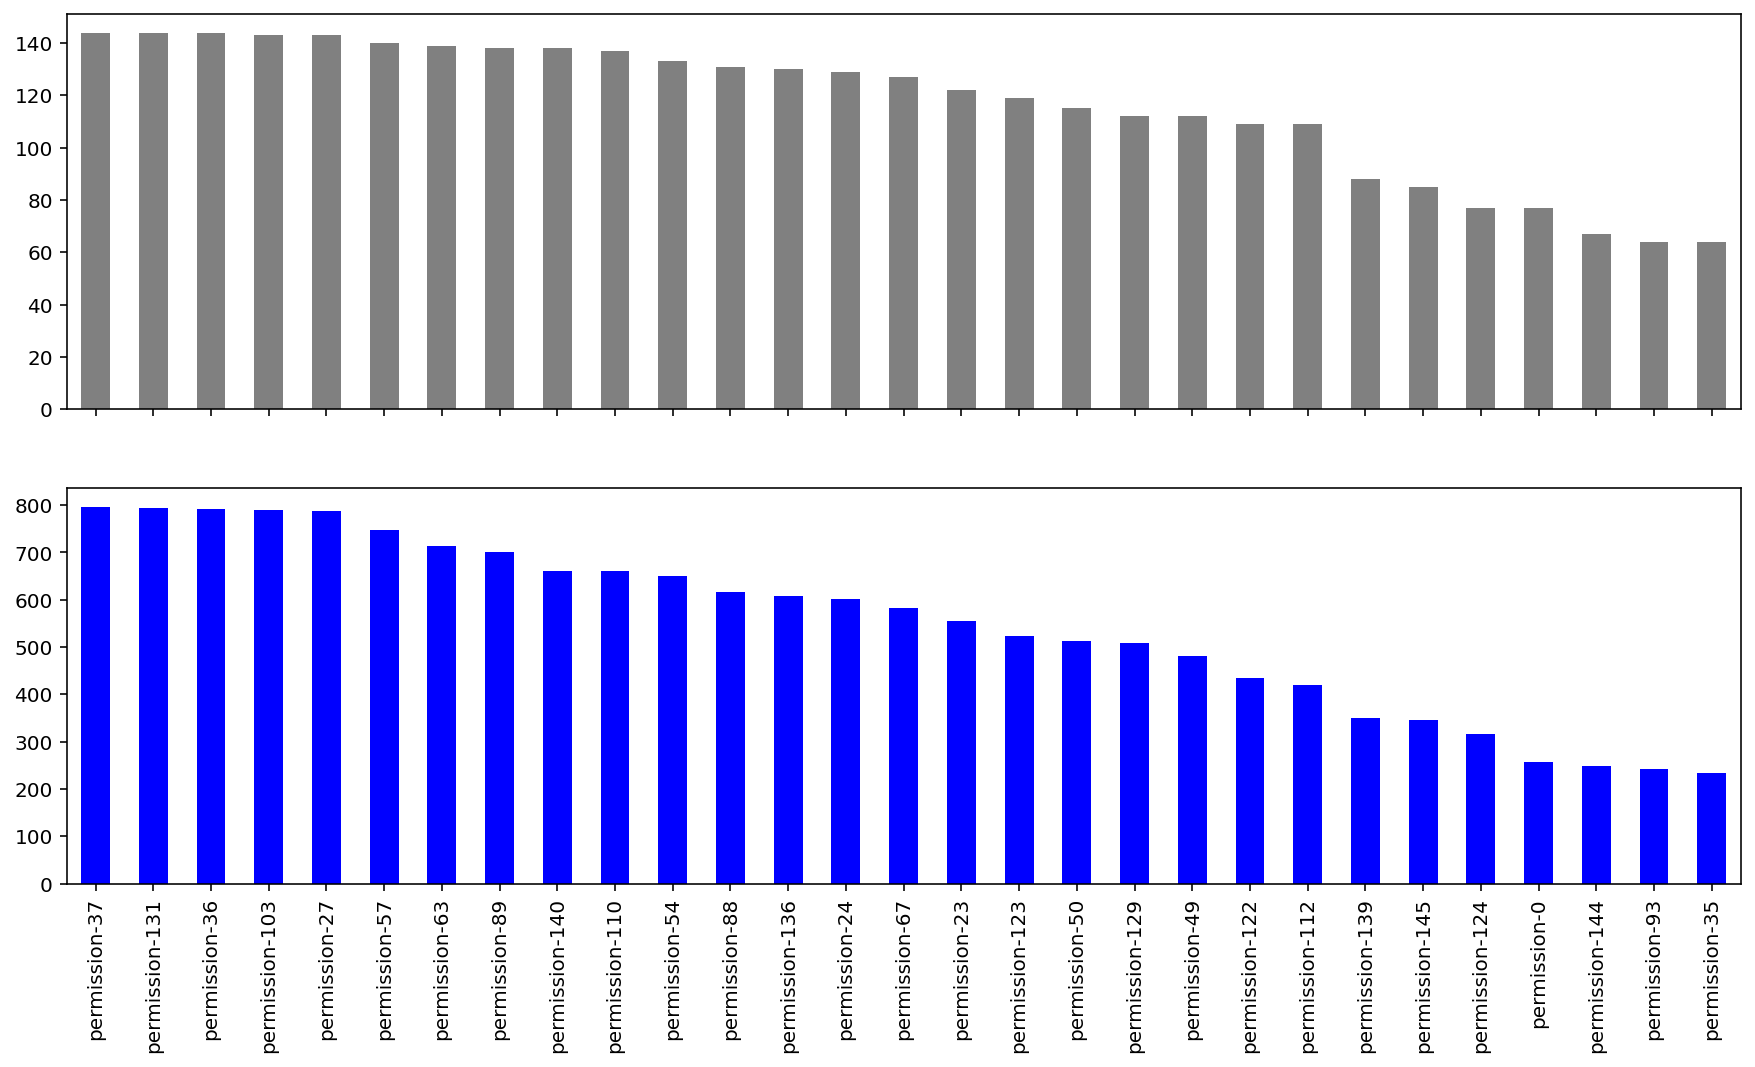

In [20]:
# 查看排名前30的特征
fig, axs =  plt.subplots(figsize=(15, 8),nrows=2, sharex=True)
pd.Series.sort_values(training_app_data.sum(axis=0), ascending=False)[1:30].plot.bar(ax=axs[0],color="gray")
pd.Series.sort_values(test_app_data.sum(axis=0), ascending=False)[1:30].plot.bar(ax=axs[1],color="blue")

In [ ]:
corrmat = training_app_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap='YlGnBu');

In [ ]:
corrmat = test_app_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap='YlGnBu');

In [21]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm


X_train = training_app_data
X_test = test_app_data
# fit the model
clf = svm.OneClassSVM(nu=0.03, kernel="rbf", gamma='auto')
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
# n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size


In [22]:
# 根据decision_function挑选出最可能有问题的前30个APP（正数示为同一类，负数表示不为同一类）
dicision_arr = clf.decision_function(X_test)

d = {'app_name': rank_app_group, 'decision_value': dicision_arr}
df = pd.DataFrame(data=d)

cls_a_result = df[df['decision_value']>0].sort_values(by='decision_value', ascending=False)

In [23]:
cls_a_result[:30]

,app_name,decision_value
85,照片恢复大师,0.040956
727,猫小帅儿歌,0.039363
365,雷电安全卫士,0.035170
527,手机极速清理管家,0.034865
603,月亮听书,0.034647
559,聊天神器,0.034477
715,书耽耽美小说,0.033948
208,蒲公英联机平台,0.033214
513,剑鱼标讯,0.033001
671,截图拼接,0.032982


In [24]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor


X_train = training_app_data
X_test = test_app_data

# fit the model for novelty detection (novelty=True)
clf = LocalOutlierFactor(n_neighbors=30, novelty=True, contamination=0.1)
clf.fit(X_train)
# DO NOT use predict, decision_function and score_samples on X_train as this
# would give wrong results but only on new unseen training_app_data (not used in X_train),
# e.g. X_test, X_outliers or the meshgrid
X_scores = clf.negative_outlier_factor_

y_pred_test = clf.predict(X_test)
n_error_test = y_pred_test[y_pred_test == -1].size

In [25]:
# 根据decision_function挑选出最可能有问题的前30个APP（正数示为同一类，负数表示不为同一类）
dicision_arr = clf.decision_function(X_test)

d = {'app_name': rank_app_group, 'decision_value': dicision_arr}
df = pd.DataFrame(data=d)

cls_b_result = df[df['decision_value']>0].sort_values(by='decision_value', ascending=False)

In [26]:
cls_b_result[:30]

,app_name,decision_value
71,淘宝联盟,0.203603
47,淘特,0.201176
723,巫溪网,0.201176
766,钢琴块块6,0.201176
443,西子湖畔,0.201176
186,聊天恢复精灵,0.201176
459,相寓,0.201176
286,夜聊,0.201176
600,陀螺多多,0.201176
536,优米,0.201176


In [27]:
# 两个模型预测共同结果
result_arr = list(set(cls_a_result.app_name.values.tolist()).intersection(cls_b_result.app_name.values.tolist()))
result_arr[:30]

['我的世界双层皮肤3D',
 '截图拼接',
 '指尖水务',
 '小黑盒',
 '藏宝阁',
 'WiFi众联钥匙',
 '维也纳酒店',
 '雷电安全卫士',
 'MAKA设计',
 '到位',
 '电e宝',
 '懒人猜歌',
 '书香小说大全',
 '美易',
 '映客直播',
 '日日顺快线司机端',
 '玩洽',
 '作业帮手',
 '中国网',
 '极速PDF阅读器',
 '快手搞笑',
 '观众网',
 '星座',
 '零基础英语学习',
 '万物心选',
 '听车汽修版',
 '批量视频转换',
 '京东金融',
 '陀螺多多',
 '动态壁纸']

In [28]:
print('😀😀😀 两个模型预测共同结果共有 {num} 个'.format(num=len(result_arr)))

😀😀😀 两个模型预测共同结果共有 440 个
